# Tweets sentiment analysis

### Importing the libraries

In [1]:
import os
import numpy as np
from nltk.tokenize import TweetTokenizer

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

import matplotlib.pyplot as plt

#MANAGEMENT PURPOSES ONLY-
from tqdm.notebook import tqdm
import gc
gc.collect()

0

Set seed to ensure reproducibility

In [2]:
SEED = 32
np.random.seed(SEED)

### Load processed dataset

In [3]:
X = np.load('./data/X.npy', allow_pickle=True)
y = np.load('./data/y.npy')

X_NOLABEL = np.load('./data/X_TEST_NO_LABEL.npy', allow_pickle=True)

In [4]:
X.shape

(420, 200)

In [6]:
X_NOLABEL.shape

(180, 200)

In [5]:
X[0][0]

"#USER# I'll DM you my address."

In [7]:
X_NOLABEL[0][0]

'Thursday games. Yet another triumph for #USER# #HASHTAG# #HASHTAG#'

In [8]:
y[0]

1

In [9]:
X = X.tolist()
y = y.tolist()
X_NOLABEL = X_NOLABEL.tolist()

In [10]:
tweet_tokenizer = TweetTokenizer()
model = Word2Vec(sentences=common_texts, vector_size=200, window=5, min_count=1, workers=4)

In [11]:
all_words = []
all_tweets = []

for profile in tqdm(X):
    for tweet in profile:
        tk = tweet_tokenizer.tokenize(tweet)
        all_words.extend(tk)
        all_tweets.append(tk)
        

  0%|          | 0/420 [00:00<?, ?it/s]

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=200, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(all_words)
tfidf.shape

(2598632, 200)

In [13]:
model_w2v = Word2Vec(
        all_tweets,
        vector_size=200, # desired no. of features/independent variables
        window=5, # context window size
        min_count=0,                           
        sg = 1, # 1 for skip-gram model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 8, # no.of cores
        seed = SEED
) 

In [12]:
model_w2v.train(all_tweets, total_examples=200*len(X), epochs=20)

(38218920, 51972640)

In [14]:
def encode_profile(profile):
    
    data = []
    # iterate through each sentence in the file
    for tweet in profile:
        # tokenize the sentence
        tokenized_tweet = tweet_tokenizer.tokenize(tweet)
        vectorized_tweet = np.zeros(200)
        for word in tokenized_tweet:
            try:
                vectorized_tweet = vectorized_tweet + model_w2v.wv[word]
            except:
                vectorized_tweet = vectorized_tweet + model_w2v.wv["unknown"]
        data.append(vectorized_tweet)
            
    return np.asarray(data)

In [15]:
example_profile = X[0]

In [16]:
e=encode_profile(example_profile)
print(e.shape)

(200, 200)


In [25]:
encoded_profiles = {}
for i in tqdm(range(len(X_NOLABEL)), desc='Encoding Profiles'):
    encoded_profiles[i] = encode_profile(X_NOLABEL[i])

Encoding Profiles:   0%|          | 0/180 [00:00<?, ?it/s]

In [26]:
len(encoded_profiles)

180

In [27]:
encoded_profiles[0].shape

(200, 200)

In [31]:
output_filepath = os.path.join('data', 'profile_matrices_word2vec_test_nolabel')

In [32]:
for i in tqdm(range(len(X_NOLABEL)), desc='Saving Profiles'):
    np.save(os.path.join(output_filepath, str(i)+".npy"), encoded_profiles[i])


Saving Profiles:   0%|          | 0/180 [00:00<?, ?it/s]

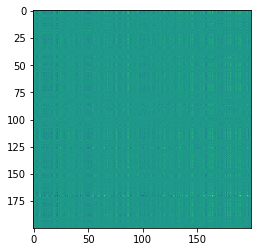

In [33]:
plt.imshow(encoded_profiles[0]-encoded_profiles[8])

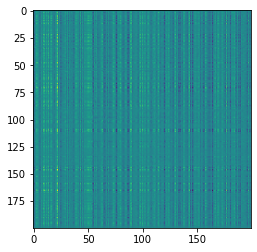

In [34]:
plt.imshow(encoded_profiles[80])